In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import GreenShield_exp
import numpy as np
import pandas as pd
from pathlib import Path

In [15]:
data_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader")
train_data = pd.read_csv(data_path / "train_data_luzern.csv")
val_data = pd.read_csv(data_path / "val_data_luzern.csv")
test_data = pd.read_csv(data_path / "test_data_luzern.csv")

In [16]:
# train_data.drop(train_data[train_data["speed"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["density"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["flow"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["rainfall"] == 0.0].index, inplace=True)
train_data = train_data.dropna()

In [17]:
train_data

,Unnamed: 0,flow,occ,date,density,speed,rainfall,visibility,windspeed,feelslike,LOS,LOS_index
0,1437,405.922343,0.077312,2015-02-27 12:00:00.000000000,0.293608,1382.531758,1.773,2.0,2.3,1.3,C,2
1,4509,469.057883,0.119387,2015-07-03 11:00:00.000000000,0.453393,1034.551078,0.000,10.0,3.6,28.1,D,3
2,8949,93.828286,0.013603,2015-12-29 00:00:00.000000000,0.051659,1816.283741,0.000,0.0,3.6,-0.1,A,0
3,111,402.161518,0.076889,2015-01-05 11:00:00.000000000,0.291999,1377.268440,0.000,0.0,6.5,-3.1,C,2
4,2225,55.344761,0.009638,2015-03-31 00:00:00.000000000,0.036602,1512.080859,0.532,10.0,12.5,7.3,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7213,6265,526.424149,0.173106,2015-09-11 17:00:00.000000000,0.657401,800.766093,0.000,10.0,5.3,19.3,E,4
7215,5191,470.155179,0.117279,2015-07-30 18:00:00.000000000,0.445390,1055.603667,0.000,10.0,10.4,18.9,D,3
7216,5390,487.394334,0.118987,2015-08-07 17:00:00.000000000,0.451874,1078.606247,0.000,10.0,7.3,33.3,D,3
7217,860,409.619589,0.084609,2015-02-04 10:00:00.000000000,0.321317,1274.814598,0.000,10.0,12.1,-7.2,C,2


In [18]:
# k_j_data = [max(train_data["density"]) for i in range(len(train_data))]  ##

u_data = train_data["speed"].values
r_data = train_data["rainfall"].values
q_data = train_data["flow"].values

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


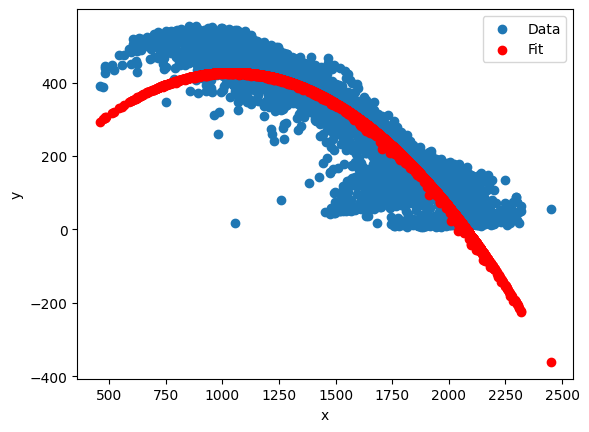

Fitted Parameters:
a = 0.006831784504525991  ===  b = 0.43445261314884487  ===  c = 7.639003537776838 === k_j = 0.8223400113243323
____________________________________________________
Error Parameters:
R2 = 0.7647255560872466  ===  MSE = 6056.749562499


In [19]:
model = GreenShield_exp.GreenShield_EXP(None, u_data, r_data, q_data)
# model = GreenShield_exp.GreenShield_EXP(k_j_data, u_data, r_data, q_data)
model.fit([0.5, 0.5, 0.5, 0.5]) ##
model.plot()
model.error()
model.get_results()
